# Fundamental of Simulation Methods
**Name**: Maximilian Richter

**Matrikel Number**: 3463789

**Student ID**: hy455

## Problem Set 9: Numerical hydrodynamics – part 2

### 9.1 Isothermal 1D hydrodynamics solver

### 1) Implement Upwind solver for isothermal Euler equations
### + 
### 2) Solve with constant time stepping

In [35]:
import numpy as np
import matplotlib.pyplot as plt

total time:  0.10050251256281371
total time:  10.050251256281388
total time:  20.100502512562723
total time:  30.05025125628114
total time:  40.10050251256237
total time:  50.05025125628079
total time:  60.10050251256202
total time:  70.05025125628043
total time:  80.10050251256166
total time:  90.05025125628008
total time:  100.1005025125613


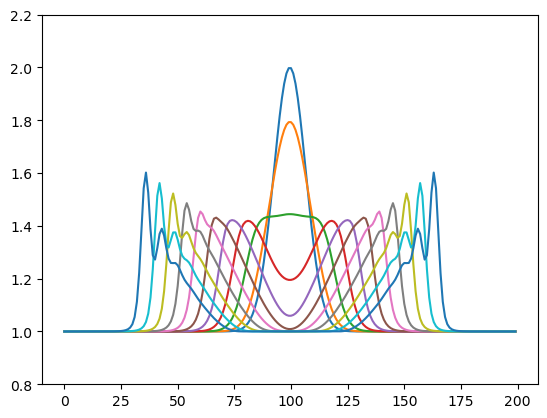

In [36]:
nx = 200
CFL = 0.1
c_sound = 1
plot_every = 10
time_max = 100

x = np.linspace(-100,100,nx)
dx = x[1] - x[0]

dt = CFL * dx/c_sound

# Initial conditions
rho = 1 + np.exp(-x**2/100)
u = np.zeros(x.shape)
momentum = rho*u 

U = np.array([rho, momentum]).T
F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

rho_result = []
total_time = 0
output_time = 0

while total_time < time_max:
    for i in range(1, nx-2):
        # Get left and right fluxes
        F_left = 0.5*(F[i-1] + F[i])
        F_right = 0.5*(F[i] + F[i+1])

        # Update state vector with Godunov scheme
        U[i] = U[i] - (dt/(2*dx)) * (F_left - F_right)

    # New state variables
    u = (U[:,1] / U[:,0]).copy()
    rho = U[:,0].copy()

    # New fluxes
    F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

    # Save for plotting
    rho_result.append(rho)

    # Get new time step by CFL criterion
    total_time += dt
    #dt = CFL * np.min(dx / (c_sound + np.abs(u)))

    # Plot every 10 seconds
    if total_time > output_time * plot_every:
        print("total time: ", total_time)
        plt.plot(rho)
        plt.ylim(0.8,2.2)
        output_time += 1

### 3) Solve with variable time stepping

total time:  0.10050251256281371
total time:  10.073172632278927
total time:  20.043955898670664
total time:  30.06144004793029
total time:  40.06161087481039
total time:  50.017871793929984
total time:  60.064486886506835
total time:  70.02913554185278


/tmp/ipykernel_73270/156123006.py:38: RuntimeWarning: overflow encountered in square
  F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T
/tmp/ipykernel_73270/156123006.py:31: RuntimeWarning: invalid value encountered in add
  U[i] = U[i] - (dt/(dx)) * (F_left + F_right)


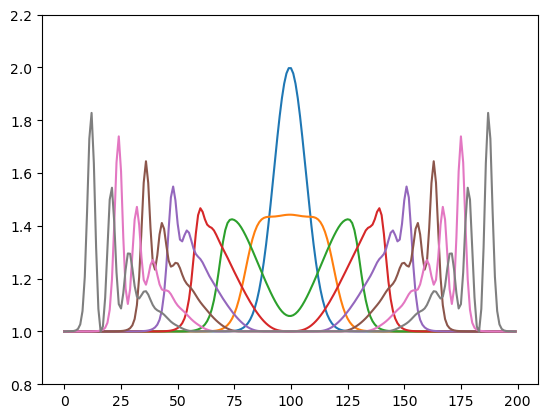

In [49]:
nx = 200
CFL = 0.1
c_sound = 1
plot_every = 10
time_max = 100

x = np.linspace(-100,100,nx)
dx = x[1] - x[0]

dt = CFL * dx/c_sound

# Initial conditions
rho = 1 + np.exp(-x**2/100)
u = np.zeros(x.shape)
momentum = rho*u 

U = np.array([rho, momentum]).T
F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

rho_result = []
total_time = 0
output_time = 0

while total_time < time_max:
    for i in range(1, nx-2):
        # Get left and right fluxes
        F_left = 0.5*(F[i-1] - F[i])
        F_right = 0.5*(F[i] - F[i+1])

        # Update state vector with Godunov scheme
        U[i] = U[i] - (dt/(dx)) * (F_left + F_right)

    # New state variables
    u = (U[:,1] / U[:,0]).copy()
    rho = U[:,0].copy()

    # New fluxes
    F = np.array([rho*u, rho*u**2 + c_sound**2*rho]).T

    # Save for plotting
    rho_result.append(rho)

    # Get new time step by CFL criterion
    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(u)))

    # Plot every 10 seconds
    if total_time > output_time * plot_every:
        print("total time: ", total_time)
        plt.plot(rho)
        plt.ylim(0.8,2.2)
        output_time += 1

total time:  0.40201005025125486
total time:  10.033525207815005
total time:  20.128787947392446
total time:  30.080267916952323
total time:  40.101932487898004
total time:  50.13741860526305
total time:  60.08944427577455
total time:  70.10866785448995
total time:  80.12390828104566
total time:  90.12246306981349
total time:  100.00755481401235


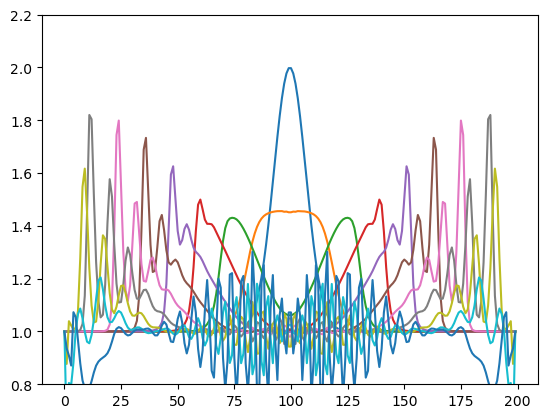

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def advect(U, v, dx, dt):
    idx_l = np.where(v >= 0)[0]
    idx_r = np.where(v < 0)[0]
 
    flux = np.zeros(np.array([v, v]).shape)
    flux[:,idx_l] = U[:,idx_l]*np.array([v[idx_l], v[idx_l]])
    flux[:,idx_r] = U[:,idx_r+1]*np.array([v[idx_r], v[idx_r]])
    U[:,1:-1] -= (dt/dx) * (flux[:,1:] - flux[:,:-1])

    return U

nx = 200
CFL = 0.4
c_sound = 1
plot_every = 10
time_max = 100

x = np.linspace(-100,100,nx)
dx = x[1] - x[0]

dt = CFL * dx/c_sound

# Initial conditions
rho = 1 + np.exp(-x**2/100)
u = np.zeros(x.shape)
momentum = rho*u 

U = np.array([rho, momentum])

rho_result = []
total_time = 0
output_time = 0

while total_time < time_max:
    # New state variables
    rho = U[0].copy()
    u = (U[1] / rho).copy()
    
    v = 0.5*(u[1:] + u[:-1])
    
    U = advect(U, v, dx, dt) - dt * np.array([np.zeros(rho.shape),np.gradient(c_sound**2*rho, dx)])

    # Save for plotting
    rho_result.append(rho)

    # Get new time step by CFL criterion
    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(u)))

    # Plot every 10 seconds
    if total_time > output_time * plot_every:
        print("total time: ", total_time)
        plt.plot(rho)
        plt.ylim(0.8,2.2)
        output_time += 1

### 4) Create a movie

In [ ]:
from maxpy.makegif import make_gif

def cback(data, name):
    plt.clf()
    plt.plot(data)
    plt.ylim(0.8,2.2)
    plt.savefig(name)

make_gif(cback, np.array(rho_result)[::3])

Save Images...


100%|██████████| 504/504 [00:35<00:00, 14.16it/s]


Done.
Make Gif...


100%|██████████| 504/504 [00:03<00:00, 141.56it/s]


Done.


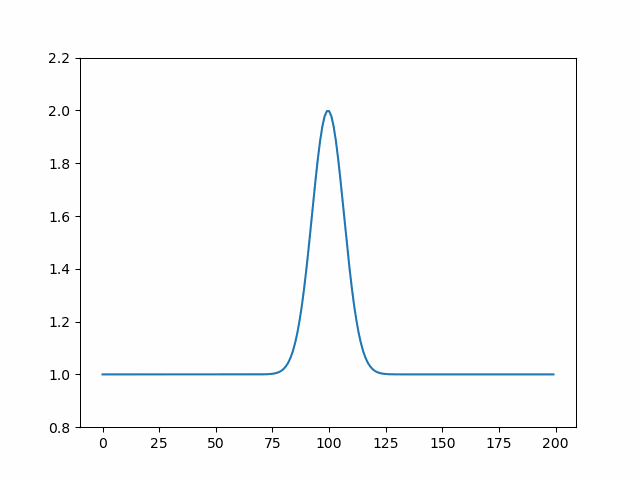

## 9.2 HLL Riemann Solver

I did not get it working :( I did not have so much time this week but maybe some aspects of the code are right :D 

total time:  0.40201005025125486
total time:  10.036531200941194
total time:  20.049321355684803
total time:  30.13758147758863
total time:  40.3089482846064
total time:  50.24834278304872
total time:  60.25985653825135
total time:  70.02436519557715
total time:  80.1690821514412
total time:  90.07720096438467
total time:  100.2380333689684


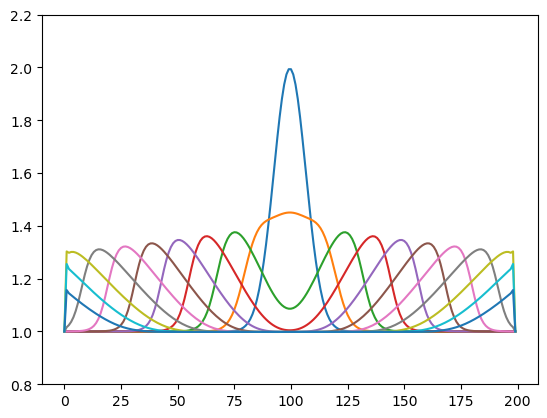

In [20]:
def hll_solver(q):
    """
    HLL approximate solver for the Riemann problem for isothermal Euler equations.

    Parameters:
        - ul: Left state [density, velocity]
        - ur: Right state [density, velocity]
        - fl: Flux function for the left state
        - fr: Flux function for the right state
        - c_sound: Speed of sound (constant)

    Returns:
        - Resultant flux at the interface [density flux, momentum flux]
    """
    # Get primitive variables
    rho = q[0]
    u = q[1]/rho

    # Compute the flux at the interface
    flux = np.array([rho * u, rho * u**2 + c_sound**2 * rho ])

    # Compute wave speeds
    S_L = u[:-1] - c_sound
    S_R = u[1:] + c_sound

    # Compute HLL flux
    hll_flux = (S_R * flux[:,:-1] - S_L * flux[:,1:] + S_L * S_R * (q[:,1:] - q[:,:-1])) / (S_R - S_L)

    idx_L = np.where(S_L >= 0)[0]
    idx_R = np.where(S_R <= 0)[0]
    hll_flux[:,idx_L] = flux[:,idx_L]
    hll_flux[:,idx_R] = flux[:,idx_R]
    return hll_flux

def riemand_step(q, dx, dt):
    hll_flux = hll_solver(q)
    q[:,1:-1] -= (dt/dx) * (hll_flux[:,1:] - hll_flux[:,:-1])
    return q

nx = 200
x = np.linspace(-100, 100, nx)
dx = x[1] - x[0]
c_sound = 1

CFL = 0.4
dt = CFL * dx / c_sound

rho = np.ones(x.shape)
rho[ x < 0] = 2
rho = 1 + np.exp(-x**2 / 100)
u = np.zeros(x.shape)
momentum = rho * u 

U = np.array([rho, momentum])
rho_result = []

total_time = 0
output_time = 0

while total_time < 100:

    U = riemand_step(U, dx, dt)

    u = (U[1] / U[0]).copy()
    rho = U[0].copy()

    rho_result.append(rho)

    total_time += dt
    dt = CFL * np.min(dx / (c_sound + np.abs(u)))

    if total_time > output_time * 10:
        print("total time: ", total_time)
        output_time += 1
        plt.plot(rho)
        plt.ylim(0.8,2.2)

In [6]:
from maxpy.makegif import make_gif

def cback(data, name):
    plt.clf()
    plt.plot(data)
    plt.ylim(0.8,2.2)
    plt.savefig(name)

make_gif(cback, rho_result, "./riemann_hll.gif")

Save Images...


100%|██████████| 317/317 [00:20<00:00, 15.79it/s]


Done.
Make Gif...


100%|██████████| 317/317 [00:01<00:00, 163.87it/s]


Done.
